## - 데이터 살펴보기
## - 결측치 확인과 처리(교재 PART5의  1절)
## - 중복행 제거(교재 PART5의 2절)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# 예제 5-1
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# deck 열의 NaN 개수 계산하기
nan_deck = df['deck'].value_counts(dropna=False) 
print(nan_deck)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64


In [3]:
# isnull() 메서드로 누락 데이터 찾기
print(df.head().isnull())

   survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0     False   False  False  False  False  False  False     False  False   
1     False   False  False  False  False  False  False     False  False   
2     False   False  False  False  False  False  False     False  False   
3     False   False  False  False  False  False  False     False  False   
4     False   False  False  False  False  False  False     False  False   

     who  adult_male   deck  embark_town  alive  alone  
0  False       False   True        False  False  False  
1  False       False  False        False  False  False  
2  False       False   True        False  False  False  
3  False       False  False        False  False  False  
4  False       False   True        False  False  False  


In [4]:
# notnull() 메서드로 누락 데이터 찾기
print(df.head().notnull())

   survived  pclass   sex   age  sibsp  parch  fare  embarked  class   who  \
0      True    True  True  True   True   True  True      True   True  True   
1      True    True  True  True   True   True  True      True   True  True   
2      True    True  True  True   True   True  True      True   True  True   
3      True    True  True  True   True   True  True      True   True  True   
4      True    True  True  True   True   True  True      True   True  True   

   adult_male   deck  embark_town  alive  alone  
0        True  False         True   True   True  
1        True   True         True   True   True  
2        True  False         True   True   True  
3        True   True         True   True   True  
4        True  False         True   True   True  


In [5]:
# isnull() 메서드로 누락 데이터 개수 구하기
print(df.head().isnull().sum(axis=0))

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           3
embark_town    0
alive          0
alone          0
dtype: int64


In [6]:
# isnull() 메서드로 누락 데이터 개수 구하기
print(df.isnull().sum(axis=0))

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


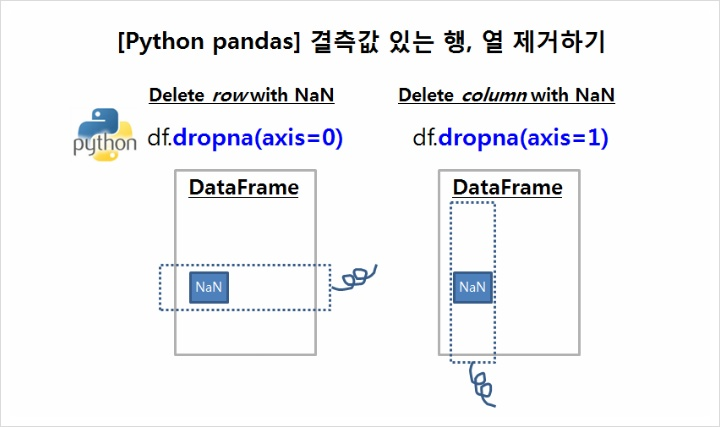

In [7]:
# 예제 5-2
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# for 반복문으로 각 열의 NaN 개수 계산하기
missing_df = df.isnull()
print(missing_df)

     survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0       False   False  False  False  False  False  False     False  False   
1       False   False  False  False  False  False  False     False  False   
2       False   False  False  False  False  False  False     False  False   
3       False   False  False  False  False  False  False     False  False   
4       False   False  False  False  False  False  False     False  False   
..        ...     ...    ...    ...    ...    ...    ...       ...    ...   
886     False   False  False  False  False  False  False     False  False   
887     False   False  False  False  False  False  False     False  False   
888     False   False  False   True  False  False  False     False  False   
889     False   False  False  False  False  False  False     False  False   
890     False   False  False  False  False  False  False     False  False   

       who  adult_male   deck  embark_town  alive  alone  
0    False      

In [ ]:
for col in missing_df.columns:
    missing_count = missing_df[col].value_counts()    # 각 열의 NaN 개수 파악
    try: 
        print(col, ': ', missing_count[True])   # NaN 값이 있으면 개수를 출력
    except:
        print(col, ': ', 0)                     # NaN 값이 없으면 0개 출력
        
# NaN 값이 500개 이상인 열을 모두 삭제 - deck 열(891개 중 688개의 NaN 값)
df_thresh = df.dropna(axis=1, thresh=500)  
print(df_thresh.columns)

In [ ]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
df_age = df.dropna(subset=['age'], how='any', axis=0)  
print(len(df_age))

In [ ]:
# 예제 5-3
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값)
print(df['age'].head(10))
print('\n')

# age 열의 NaN값을 다른 나이 데이터의 평균으로 변경하기
mean_age = df['age'].mean(axis=0)   # age 열의 평균 계산 (NaN 값 제외)
df['age'].fillna(mean_age, inplace=True)

# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값이 평균으로 대체)
print(df['age'].head(10))

In [ ]:
# 예제 5-4
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# embark_town 열의 829행의 NaN 데이터 출력
print(df['embark_town'][825:830])
print('\n')

In [ ]:
df['embark_town'].value_counts(dropna=True)

In [ ]:
# embark_town 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = df['embark_town'].value_counts(dropna=True).idxmax()   
print(most_freq)
print('\n')

In [ ]:
df['embark_town'].fillna(most_freq, inplace=True)

# embark_town 열 829행의 NaN 데이터 출력 (NaN 값이 most_freq 값으로 대체)
print(df['embark_town'][825:830])

In [ ]:
# 예제 5-5
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# embark_town 열의 829행의 NaN 데이터 출력
print(df['embark_town'][825:830])
print('\n')

In [ ]:
# embark_town 열의 NaN값을 바로 앞에 있는 828행의 값으로 변경하기
df['embark_town'].fillna(method='ffill', inplace=True)
print(df['embark_town'][825:830])

In [ ]:
# 예제 5-6
# 라이브러리 불러오기
import pandas as pd

# 중복 데이터를 갖는 데이터프레임 만들기
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
print(df)
print('\n')

# 데이터프레임 전체 행 데이터 중에서 중복값 찾기
df_dup = df.duplicated()
print(df_dup)
print('\n')

# 데이터프레임의 특정 열 데이터에서 중복값 찾기
col_dup = df['c2'].duplicated()
print(col_dup)

In [ ]:
# 예제 5-7
# 라이브러리 불러오기
import pandas as pd

# 중복 데이터를 갖는 데이터프레임 만들기
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
print(df)
print('\n')

In [ ]:
# 데이터프레임에서 중복 행을 제거
df2 = df.drop_duplicates()
print(df2)
print('\n')

In [ ]:
# c2, c3열을 기준으로 중복 행을 제거
df3 = df.drop_duplicates(subset=['c2', 'c3'])
print(df3)

### Seaborn 패키지에서 제공하는 타이타닉 데이터셋

1. survived - 생존 여부, 0이면 사망, 1이면 생존
2. pclass - 객실 등급, 1이면 1등급, 2이면 2등급, 3이면 3등급
3. sex - 성별, male이면 남자, female이면 여자
4. age - 나이
5. sibsp - 함께 탑승한 형제 및 배우자 수
6. parch - 함께 탑승한 자녀 및 부모 수
7. fare - 요금
8. embarked - 탑승지 이름 앞글자, C는 Cherbourg, Q는 Queenstown, S는 Southampton
9. class - 객실 등급, First면 1등급, Second면 2등급, Third면 3등급
10. who - 남자, 여자, 아이(man, woman, child
11. adult_male - 성인 남자인지 여부, True면 성인 남자, False면 그외
12. deck - 선실 번호 첫 알파벳(A, B, C, D, E, F, G)
13. embark_town - 탑승지 이름(Cherbourg, Queenstown, Southampton)
14. alive - 생존여부(no면 사망, yes면 생존)
15. alone - 혼자 탑승했는지 여부, True면 혼자 탑승, False면 가족과 함께 탑승

 

In [ ]:
# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')
df.head()

In [ ]:
print(df.info()) 

In [ ]:
# deck 열의 NaN 개수 계산하기
nan_deck = df['deck'].value_counts(dropna=False) 
print(nan_deck)

In [ ]:
# isnull() 메서드로 누락 데이터 찾기
print(df.head().isnull())

In [ ]:
# notnull() 메서드로 누락 데이터 찾기
print(df.head().notnull())

In [ ]:
# isnull() 메서드로 누락 데이터 개수 구하기
print(df.isnull().sum(axis=0))

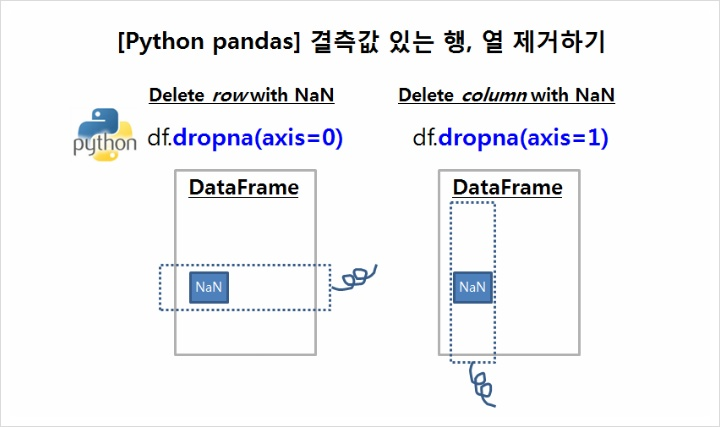

In [ ]:
# NaN 값이 500개 이상인 열을 모두 삭제 - deck 열(891개 중 688개의 NaN 값)
df_thresh = df.dropna(axis=1, thresh=500)  
print(df_thresh.columns)

In [ ]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
df_age = df.dropna(subset=['age'], how='any', axis=0)  
print(len(df_age))

In [ ]:
# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값)
print(df['age'].head(10))

In [ ]:
# age 열의 NaN값을 다른 나이 데이터의 평균으로 변경하기
mean_age = df['age'].mean(axis=0)   # age 열의 평균 계산 (NaN 값 제외)
df['age'].fillna(mean_age, inplace=True)

# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값이 평균으로 대체)
print(df['age'].head(10))

In [ ]:
# embark_town 열의 829행의 NaN 데이터 출력
print(df['embark_town'][825:830])
print('\n')

In [ ]:
df1 = df.copy()

In [ ]:
df1['embark_town'].value_counts(dropna=True)

In [ ]:
# embark_town 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = df1['embark_town'].value_counts(dropna=True).idxmax()   
print(most_freq)

In [ ]:
df1['embark_town'].fillna(most_freq, inplace=True)

# embark_town 열 829행의 NaN 데이터 출력 (NaN 값이 most_freq 값으로 대체)
print(df1['embark_town'][825:830])

In [ ]:
# embark_town 열의 829행의 NaN 데이터 출력
print(df['embark_town'][825:830])
print('\n')

In [ ]:
df2 = df.copy()

In [ ]:
# embark_town 열의 NaN값을 바로 앞에 있는 828행의 값으로 변경하기
df2['embark_town'].fillna(method='ffill', inplace=True) # bfill
print(df2['embark_town'][825:830])

### 여기까지 교재의 소스
----

In [8]:
import pandas as pd
bank_df = pd.read_csv('data/bank.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [9]:
# 데이터의 건수, 항목수를 확인
print(bank_df.shape)

# 데이터형을 확인
print(bank_df.dtypes)

(7234, 17)
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [10]:
# 데이터에 대한 여러가지 정보들을 한번에 출력
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7234 non-null   int64 
 1   job        7190 non-null   object
 2   marital    7234 non-null   object
 3   education  6961 non-null   object
 4   default    7234 non-null   object
 5   balance    7234 non-null   int64 
 6   housing    7234 non-null   object
 7   loan       7234 non-null   object
 8   contact    5196 non-null   object
 9   day        7234 non-null   int64 
 10  month      7234 non-null   object
 11  duration   7234 non-null   int64 
 12  campaign   7234 non-null   int64 
 13  pdays      7234 non-null   int64 
 14  previous   7234 non-null   int64 
 15  poutcome   1334 non-null   object
 16  y          7234 non-null   object
dtypes: int64(7), object(10)
memory usage: 960.9+ KB


In [11]:
# 기술 통계량 확인
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


In [12]:
bank_df.isna().sum() 

age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64

In [13]:
bank_df.isna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7229,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7230,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7231,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7232,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


<AxesSubplot:>

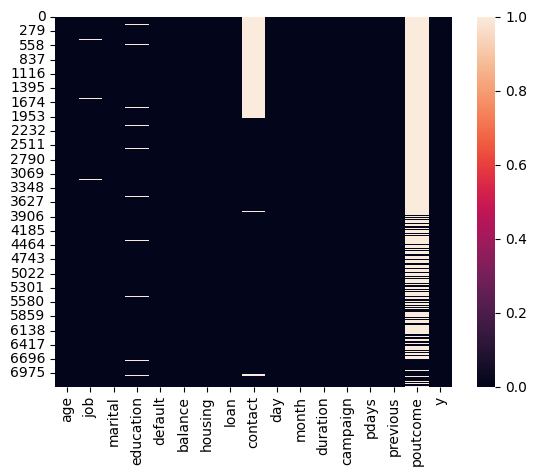

In [14]:
import seaborn as sns
sns.heatmap(bank_df.isna(), cbar=True)

In [15]:
!pip install missingno


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\82102\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


<AxesSubplot:>

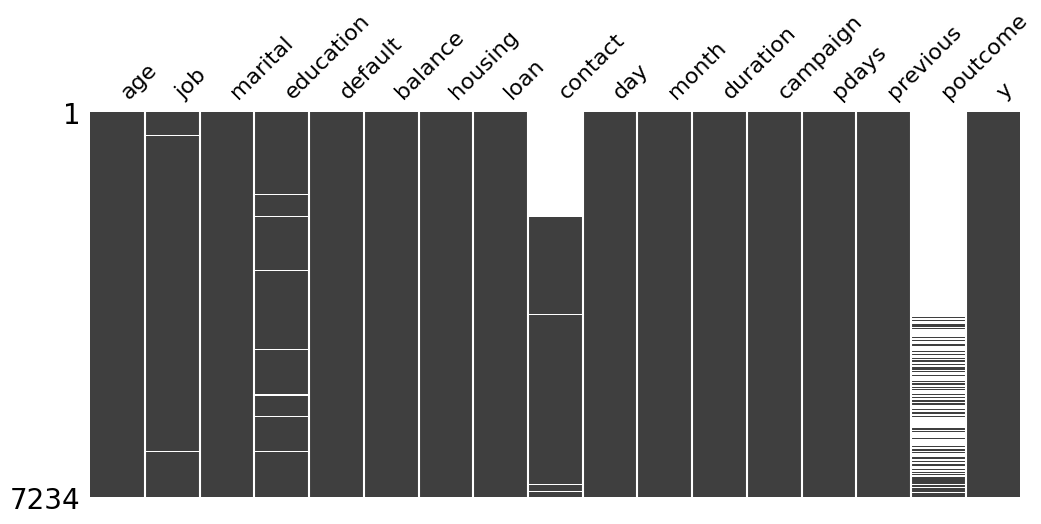

In [16]:
import missingno as msno 
msno.matrix(bank_df, figsize=(12,5), sparkline=False)

In [17]:
msno.matrix?

Signature:
msno.matrix(
    df,
    filter=None,
    n=0,
    p=0,
    sort=None,
    figsize=(25, 10),
    width_ratios=(15, 1),
    color=(0.25, 0.25, 0.25),
    fontsize=16,
    labels=None,
    label_rotation=45,
    sparkline=True,
    freq=None,
    ax=None,
)
Docstring:
A matrix visualization of the nullity of the given DataFrame.

:param df: The `DataFrame` being mapped.
:param filter: The filter to apply to the heatmap. Should be one of "top", "bottom", or None (default).
:param n: The max number of columns to include in the filtered DataFrame.
:param p: The max percentage fill of the columns in the filtered DataFrame.
:param sort: The row sort order to apply. Can be "ascending", "descending", or None.
:param figsize: The size of the figure to display.
:param fontsize: The figure's font size. Default to 16.
:param labels: Whether or not to display the column names. Defaults to the underlying data labels when there are
    50 columns or less, and no labels when there are more t

<AxesSubplot:>

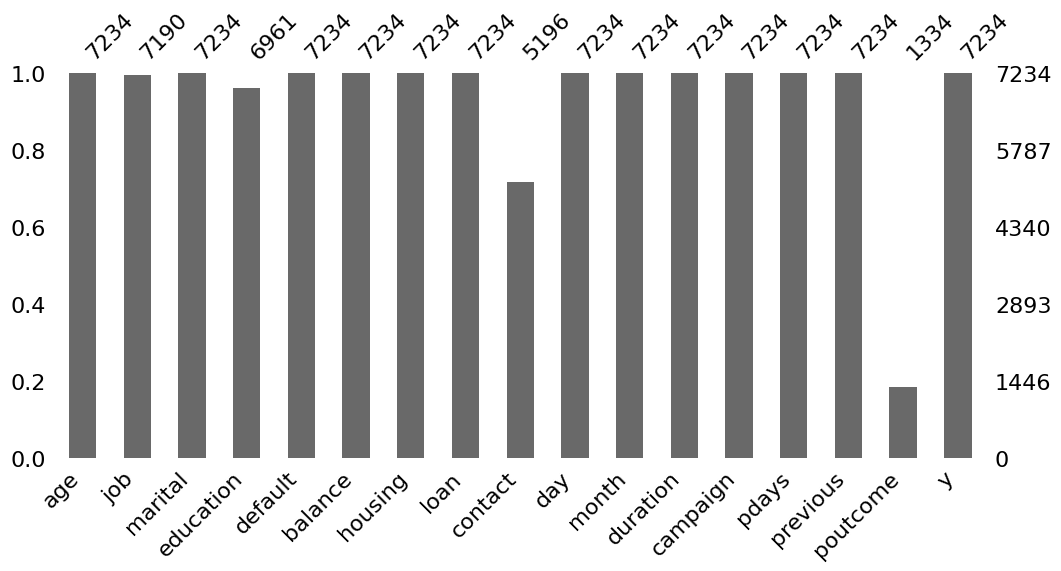

In [18]:
msno.bar(bank_df, figsize=(12,5))

### 결측치를 포함한 행 삭제

In [19]:
# job과 education 열에서 결측치가 포함된 행을 삭제
bank_df = bank_df.dropna(subset=['job', 'education'])

# 데이터의 건수, 항목수를 확인
print(bank_df.shape)

(6935, 17)


<AxesSubplot:>

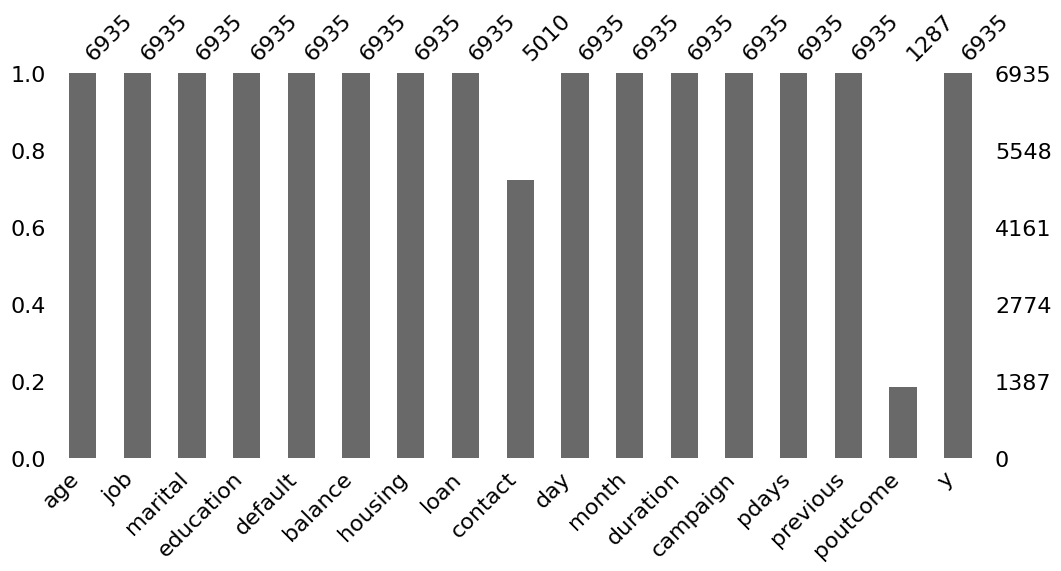

In [20]:
msno.bar(bank_df, figsize=(12,5))

### 결측치를 2400개이상 포함한 열 삭제

In [21]:
# 결측치이 2400개 이상인 열을 제외
bank_df = bank_df.dropna(thresh=2400, axis=1) # axis 중요!!!

# 데이터의 건수, 항목수를 확인
print(bank_df.shape)
print(bank_df.info())

(6935, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6935 entries, 0 to 7233
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        6935 non-null   int64 
 1   job        6935 non-null   object
 2   marital    6935 non-null   object
 3   education  6935 non-null   object
 4   default    6935 non-null   object
 5   balance    6935 non-null   int64 
 6   housing    6935 non-null   object
 7   loan       6935 non-null   object
 8   contact    5010 non-null   object
 9   day        6935 non-null   int64 
 10  month      6935 non-null   object
 11  duration   6935 non-null   int64 
 12  campaign   6935 non-null   int64 
 13  pdays      6935 non-null   int64 
 14  previous   6935 non-null   int64 
 15  y          6935 non-null   object
dtypes: int64(7), object(9)
memory usage: 921.1+ KB
None


<AxesSubplot:>

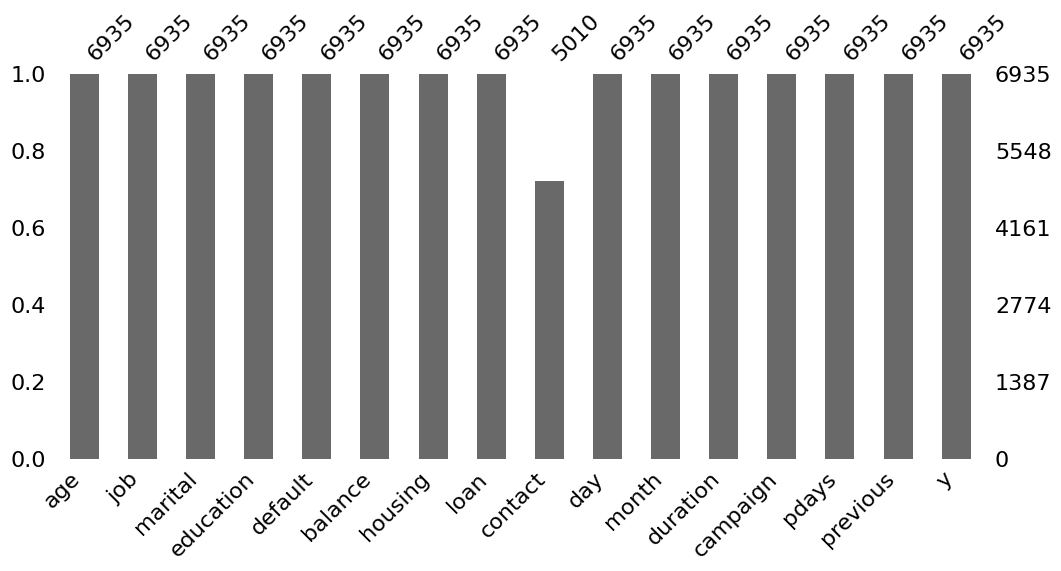

In [22]:
msno.bar(bank_df, figsize=(12,5))

### 결측치 채우기

In [24]:
# 결측치을 「unknown」으로 치환
bank_df = bank_df.fillna({'contact':'unknown'})

# 선두에서 5행까지 표시
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,may,348,1,-1,0,no
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,no
3,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,no
4,24,technician,single,secondary,no,-103,yes,yes,unknown,5,may,145,1,-1,0,no


<AxesSubplot:>

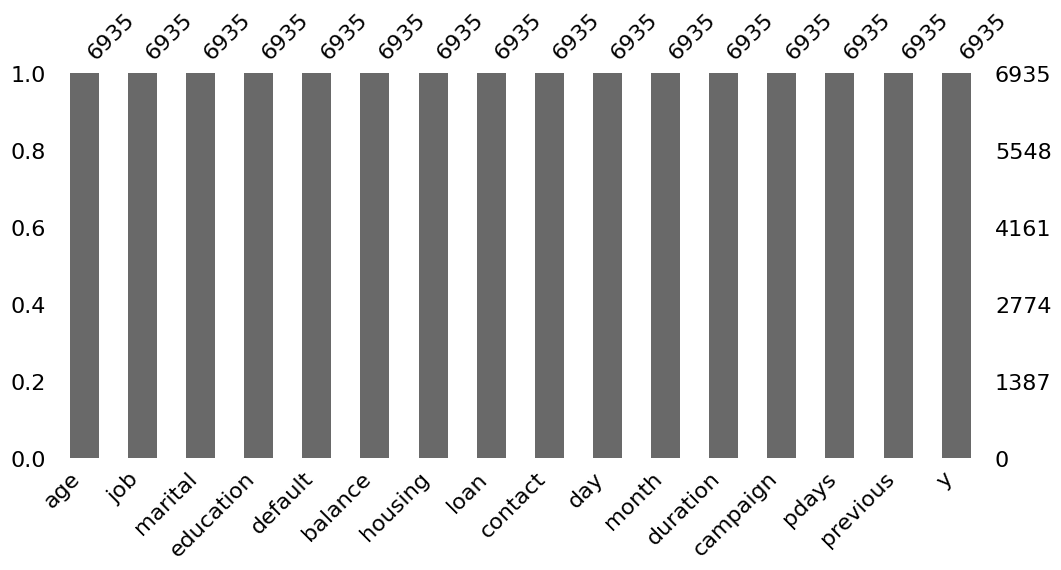

In [25]:
msno.bar(bank_df, figsize=(12,5))

In [26]:
import numpy as np
time_index = pd.date_range("2022-01-01", periods=5, freq="MS")
print(time_index)

DatetimeIndex(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01'],
              dtype='datetime64[ns]', freq='MS')


In [27]:
dataframe = pd.DataFrame(index=time_index)

dataframe["Sales"] = [1.0,2.0,np.nan,np.nan,5.0]
dataframe

,Sales
2022-01-01,1.0
2022-02-01,2.0
2022-03-01,NaN
2022-04-01,NaN
2022-05-01,5.0


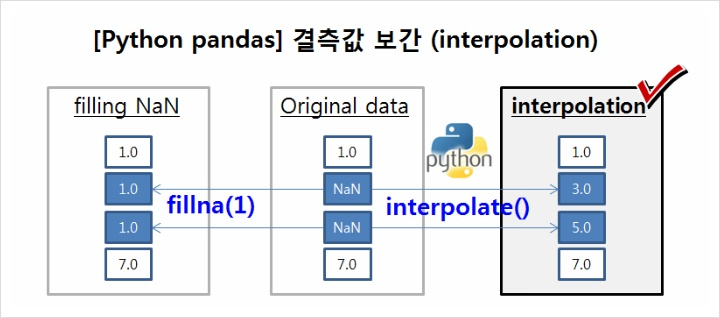

In [28]:
# 누락된 값을 보간합니다.
dataframe.interpolate()

,Sales
2022-01-01,1.0
2022-02-01,2.0
2022-03-01,3.0
2022-04-01,4.0
2022-05-01,5.0


In [29]:
# 앞쪽으로 채우기(Forward-fill)
dataframe.ffill()

,Sales
2022-01-01,1.0
2022-02-01,2.0
2022-03-01,2.0
2022-04-01,2.0
2022-05-01,5.0


In [30]:
dataframe.fillna(method ='ffill') 

,Sales
2022-01-01,1.0
2022-02-01,2.0
2022-03-01,2.0
2022-04-01,2.0
2022-05-01,5.0


In [31]:
# 뒤쪽으로 채우기(Back-fill)
dataframe.bfill()

,Sales
2022-01-01,1.0
2022-02-01,2.0
2022-03-01,5.0
2022-04-01,5.0
2022-05-01,5.0


In [32]:
dataframe.fillna(method ='bfill') 

,Sales
2022-01-01,1.0
2022-02-01,2.0
2022-03-01,5.0
2022-04-01,5.0
2022-05-01,5.0


In [33]:
dict = {'One' :  [np.nan, np.nan, 95, 80], 
    'Two' : [np.nan, np.nan, np.nan, np.nan], 
    'Three':[52, np.nan, 80, 98], 
    'Four':[np.nan, np.nan, np.nan, 65],
    'Five':[10, None, 30, 40],
    'Six': [np.nan, np.nan, np.nan, pd.NaT],
    'Seven': [np.nan, np.nan, None, np.nan],
    'Eight': [np.nan, np.nan, None, pd.NaT]} 

df = pd.DataFrame(dict)
display(df)

,One,Two,Three,Four,Five,Six,Seven,Eight
0,NaN,NaN,52.0,NaN,10.0,NaT,NaN,NaT
1,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT
2,95.0,NaN,80.0,NaN,30.0,NaT,NaN,NaT
3,80.0,NaN,98.0,65.0,40.0,NaT,NaN,NaT


In [34]:
df.dropna(how = 'all') 

,One,Two,Three,Four,Five,Six,Seven,Eight
0,NaN,NaN,52.0,NaN,10.0,NaT,NaN,NaT
2,95.0,NaN,80.0,NaN,30.0,NaT,NaN,NaT
3,80.0,NaN,98.0,65.0,40.0,NaT,NaN,NaT


In [35]:
df.dropna(how = 'all', axis=1) 

,One,Three,Four,Five
0,NaN,52.0,NaN,10.0
1,NaN,NaN,NaN,NaN
2,95.0,80.0,NaN,30.0
3,80.0,98.0,65.0,40.0


In [36]:
df.dropna(subset=['One', 'Four'])

,One,Two,Three,Four,Five,Six,Seven,Eight
3,80.0,NaN,98.0,65.0,40.0,NaT,NaN,NaT


In [37]:
df.dropna(subset=['Eight'])

,One,Two,Three,Four,Five,Six,Seven,Eight


In [38]:
df.isna()

,One,Two,Three,Four,Five,Six,Seven,Eight
0,True,True,False,True,False,True,True,True
1,True,True,True,True,True,True,True,True
2,False,True,False,True,False,True,True,True
3,False,True,False,False,False,True,True,True


In [39]:
df.isna().sum()

One      2
Two      4
Three    1
Four     3
Five     1
Six      4
Seven    4
Eight    4
dtype: int64

In [40]:
dict = {'First Score':[100, 90, None, 95, 85], 
        'Second Score': [30, 45, None, np.nan, 60], 
        'Third Score':[np.nan, 40, np.nan, 80, None]} 
df = pd.DataFrame(dict) 
display(df)

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,NaN,NaN
3,95.0,NaN,80.0
4,85.0,60.0,NaN


In [41]:
df.isna()

,First Score,Second Score,Third Score
0,False,False,True
1,False,False,False
2,True,True,True
3,False,True,False
4,False,False,True


In [42]:
df.fillna(0) 

,First Score,Second Score,Third Score
0,100.0,30.0,0.0
1,90.0,45.0,40.0
2,0.0,0.0,0.0
3,95.0,0.0,80.0
4,85.0,60.0,0.0


In [43]:
df.fillna(method ='ffill') 

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,90.0,45.0,40.0
3,95.0,45.0,80.0
4,85.0,60.0,80.0


In [44]:
df.fillna(method ='bfill')  

,First Score,Second Score,Third Score
0,100.0,30.0,40.0
1,90.0,45.0,40.0
2,95.0,60.0,80.0
3,95.0,60.0,80.0
4,85.0,60.0,NaN


In [45]:
df.replace(to_replace = np.nan, value = -50)

,First Score,Second Score,Third Score
0,100.0,30.0,-50.0
1,90.0,45.0,40.0
2,-50.0,-50.0,-50.0
3,95.0,-50.0,80.0
4,85.0,60.0,-50.0


In [46]:
df.interpolate(limit_direction ='forward') 

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,92.5,50.0,60.0
3,95.0,55.0,80.0
4,85.0,60.0,80.0


In [47]:
df.interpolate(limit_direction ='backward') 

,First Score,Second Score,Third Score
0,100.0,30.0,40.0
1,90.0,45.0,40.0
2,92.5,50.0,60.0
3,95.0,55.0,80.0
4,85.0,60.0,NaN


In [48]:
df.interpolate(limit_direction ='both') 

,First Score,Second Score,Third Score
0,100.0,30.0,40.0
1,90.0,45.0,40.0
2,92.5,50.0,60.0
3,95.0,55.0,80.0
4,85.0,60.0,80.0


---
### 중복행 채크와 제거

In [49]:
import pandas as pd

# 중복 데이터를 갖는 데이터프레임 만들기
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
print(df)

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


In [50]:
# 데이터프레임 전체 행 데이터 중에서 중복값 찾기
df_dup = df.duplicated()
print(df_dup)

0    False
1     True
2    False
3    False
4    False
dtype: bool


In [51]:
# 데이터프레임의 특정 열 데이터에서 중복값 찾기
col_dup = df['c2'].duplicated()
print(col_dup)

0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool


In [52]:
# 데이터프레임에서 중복 행을 제거
df2 = df.drop_duplicates()
print(df2)

  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


In [53]:
# c2, c3열을 기준으로 중복 행을 제거
df3 = df.drop_duplicates(subset=['c2', 'c3'])
print(df3)

  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2


---

### auto-mpg.csv 의 설명
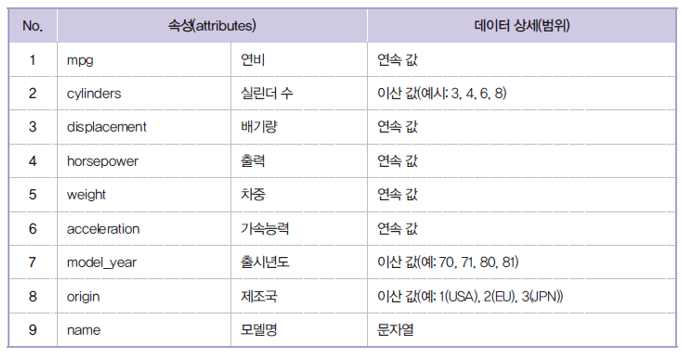

In [54]:
import pandas as pd
# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)
# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 
print(df.head(3))    

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  


In [55]:
print(df.dtypes)   

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object


In [56]:
# horsepower 열의 고유값 확인
print(df['horsepower'].unique())
print('\n')

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']




### 타입 변환

In [57]:
# 누락 데이터('?') 삭제 
import numpy as np
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# horsepower 열의 자료형 확인
print(df['horsepower'].dtypes)  

float64


---